In [2]:
import cv2
import numpy as np
import os
import sys
sys.path.append('../../src')
import DISData as DD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
doUT = DD.SQL()

host:  192.168.0.128
user:  diadmin
password:  ········


SQL connection done


In [1]:
data_name = 'preventing_drowsy_semicontrolled'

In [29]:
query = f'''select occupant_sex, count(img_dir) as count from DeepInSight.{data_name}_landmark_info group by occupant_sex;'''

In [30]:
db = doUT.db
conn = doUT.conn
conn.execute(query)
column_names = [desc[0] for desc in conn.description]
result = conn.fetchall()
db.commit()

In [31]:
df = pd.DataFrame(result, columns=column_names)
df['count'] = df['count'].astype('int64')

In [32]:
df = df.sort_values(by='count')
df

,occupant_sex,count
0,F,22686
1,M,23813


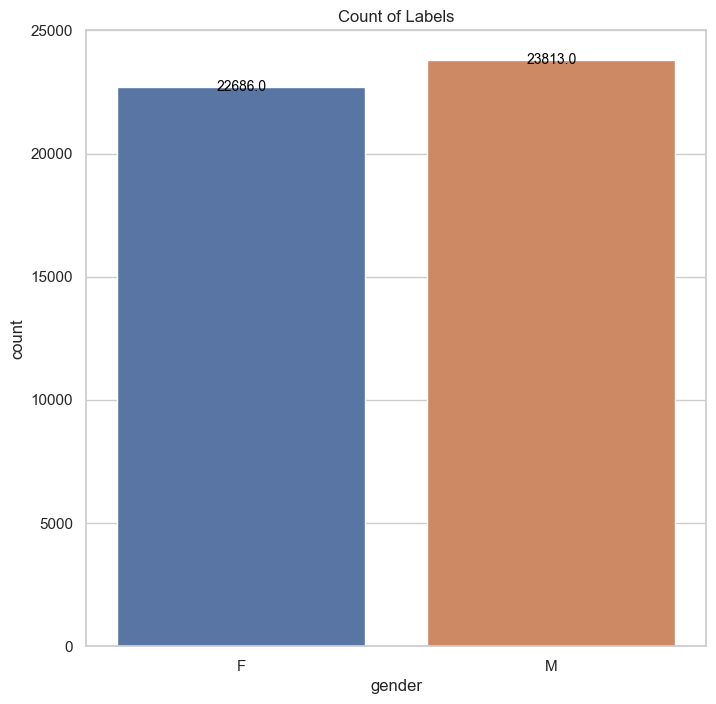

In [33]:
try:
    plt.figure(figsize=(8, 8))
    sns.set(style="whitegrid")
    ax = sns.barplot(x='occupant_sex', y='count', data=df, hue='occupant_sex')
    for p in ax.patches:
        label = p.get_height()  # 막대의 너비를 가져와서 count로 사용
        count = p.get_x() + p.get_width() / 2  # 막대의 y 좌표를 가져와서 label로 사용
        ax.annotate(f'{label}', (count, label), ha='center', va='center', fontsize=10, color='black')
    plt.xlabel('gender')
    plt.ylabel('count')
    plt.title('Count of Labels')
    save_path = f'label/{data_name}_label1.png'
    if not os.path.exists('label'):
        os.makedirs('label')
    if os.path.exists(save_path):
        os.remove(save_path)
    plt.savefig(save_path)
except Exception as e:
    print(e)